In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('data/csv/user_data.csv') 
df.columns

Index(['id', 'age', 'gender', 'race_ethnicity', 'socio_economic_status',
       'urban_rural', 'parental_involvement', 'hobbies', 'Openness',
       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism',
       'average_positive_probability_before', 'count_id_before',
       'average_positive_probability_after', 'count_id_after', 'diff',
       'mental_health_score_before', 'mental_health_score_after',
       'score_change', 'gratitude', 'journals', 'sunny', 'cloudy', 'rainy',
       'snowy', 'windy', 'exercise', 'movie_tv', 'gaming', 'reading',
       'instrument', 'walk', 'music', 'drawing', 'class', 'study', 'homework',
       'exam', 'sleep'],
      dtype='object')

In [36]:

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Drop unnecessary columns for modeling
removed_cols = ['id', 'hobbies', 'average_positive_probability_before', 
                'average_positive_probability_after', 'diff','score_change', 
                'count_id_after','count_id_before','urban_rural','race_ethnicity']
df = df.drop(columns=removed_cols)
df.shape

(300, 31)

In [37]:
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
df = df.fillna(df.mean())  # Impute missing values with mean

# Define categorical columns
categorical_columns = ['gender', 'socio_economic_status', 'parental_involvement', 'Openness',
                       'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['mental_health_score_after'])
y = df['mental_health_score_after']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 114.63
R-squared (R2): 0.81


In [12]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(fi_df.head(10))  # Display top 10 most important features

                      Feature  Importance
0  mental_health_score_before    0.343900
1                    exercise    0.165220
2                       music    0.138922
3                   gratitude    0.063638
4                      gaming    0.059231
5                    journals    0.039258
6                       rainy    0.023420
7                    movie_tv    0.022456
8                        exam    0.019739
9                     reading    0.018835


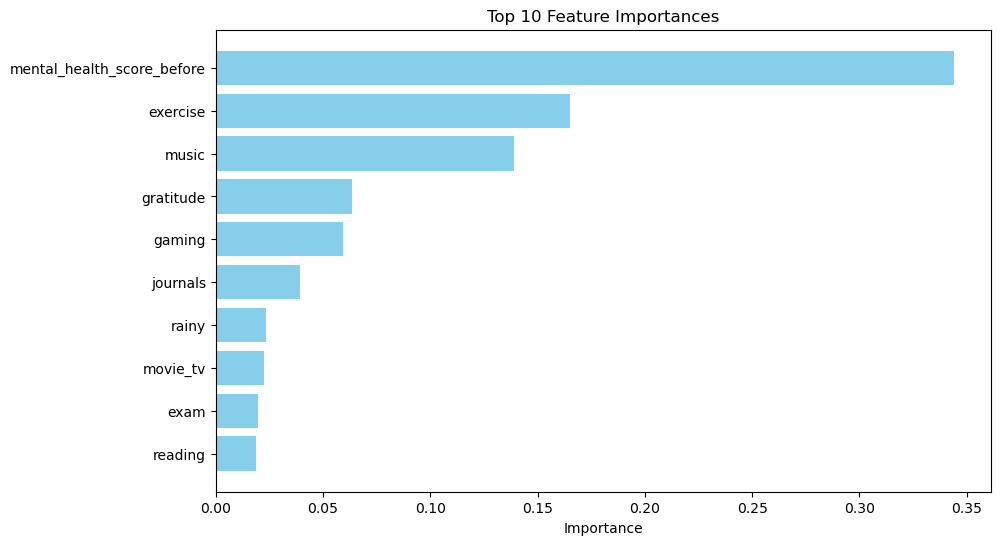

In [15]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'][:10], fi_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [18]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


C:\Users\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


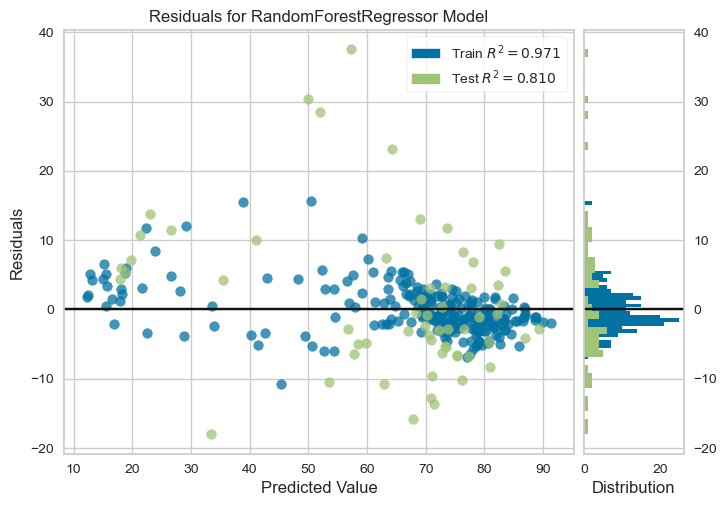

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [24]:
# 2. Residuals Plot
from yellowbrick.regressor import ResidualsPlot

# Create a residuals plot
visualizer = ResidualsPlot(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

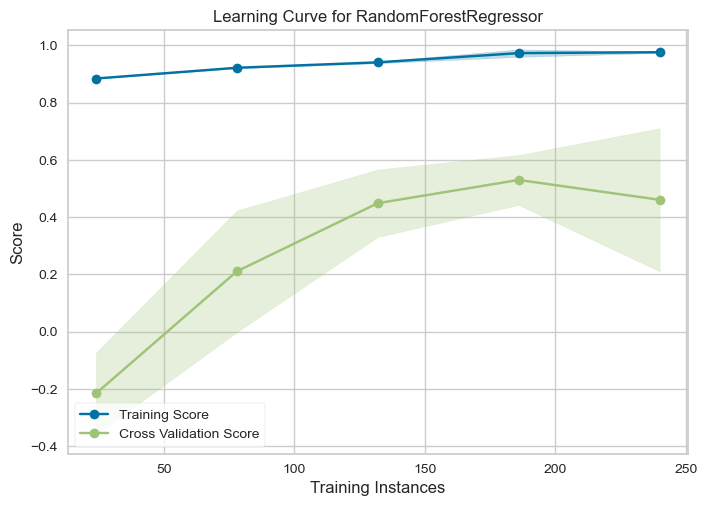

<Axes: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [20]:
# 3. Learning Curve
from yellowbrick.model_selection import LearningCurve

# Create a learning curve
visualizer = LearningCurve(rf_model, scoring='r2')
visualizer.fit(X, y)
visualizer.show()

C:\Users\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


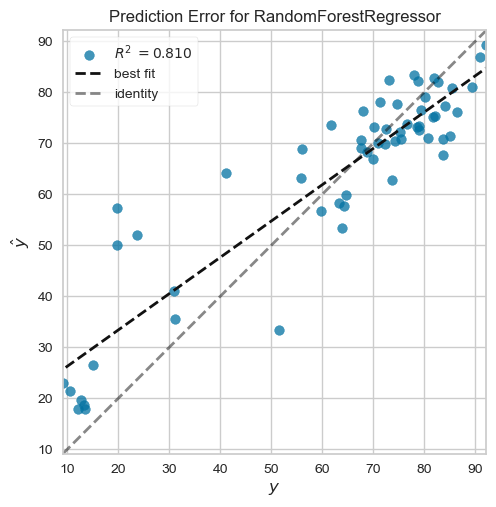

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
# 4. Prediction Error Plot
from yellowbrick.regressor import PredictionError

# Create a prediction error plot
visualizer = PredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Grid Search

In [45]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 3,5,8,10, 20],
    'min_samples_split': [2,3, 5],
    'min_samples_leaf': [1, 2,3],
    'max_features': ['sqrt', 'log2', None]  # Valid options for max_features
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Example scoring metric for regression
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 8, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
best_rf_model = grid_search.best_estimator_  # or random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 113.83
R-squared (R2): 0.81


In [47]:
# Get the best parameters
best_params = grid_search.best_params_

print(f'Best parameters found by GridSearchCV: {best_params}')

Best parameters found by GridSearchCV: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Random Search

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Example parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),  # Random integer between 100 and 1000
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 5),   # Random integer between 1 and 5
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Search
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

print(f'Best parameters found by RandomizedSearchCV: {best_params}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by RandomizedSearchCV: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 507}


In [50]:
best_rf_model = grid_search.best_estimator_  # or random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 113.83
R-squared (R2): 0.81
